In [2]:
from ckanapi import RemoteCKAN
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from pandas.io.json import json_normalize

ua = 'avoindata_ckanapi_example/1.0 ({0})'
ckan = RemoteCKAN('https://beta.avoindata.fi/data/fi/', user_agent=ua)
packages = ckan.action.package_search(q='Kansaneläkelaitos', fq = 'title:opintotuen')
resources = packages['results'][0]['resources'] 
url_csv = resources[0]['url']
url_json = resources[1]['url']
dat = pd.read_csv(url_csv, sep = ';', decimal = ',')

In [3]:
response = urlopen(url_json)
meta = json.loads(response.read())

## Datan ja metadatan kuvailu

**Datan kuvaustieto**

In [4]:
print(meta['description'])

Raportilla on tiedot opintotuen saajista, maksetuista tuista ja keskimääräisistä tuista tilastointijakson aikana. Opintotuen saajia ovat opintorahaa, asumislisää tai opintolainan valtiontakauksen saaneet henkilöt. Maksettuihin tukiin on tilastoitu säännöllisten tai takautuvien maksujen lisäksi myös opintoetuuksien palautukset. Keskimääräiseen opintotukeen (euroa/saaja) on tilastoitu ainoastaan säännöllisesti maksetut tuet ja opintolainan valtiontakauksen euromäärä. Opintotuen saajat ja maksetut etuudet tilastoidaan kalenterivuosittain, lukuvuosittain ja kuukausittain. Lukuvuosi alkaa elokuun alussa ja päättyy seuraavan vuoden heinäkuun lopussa. Oppilaitosaste määräytyy etuuden maksutapahtumaan liittyvän oppilaitosnumeron perusteella. Oletusarvoisesti opintotuen saaja tilastoituu tilastointijakson viimeisimmän maksutapahtuman mukaiseen oppilaitosasteeseen. Valinnalla 'Astetiedon peruste: Kaikki oppilaitokset' tuen saaja tilastoituu kaikkiin tilastointijakson maksutapahtumien mukaisiin o

**Datan muuttujatieto**

In [5]:
json_normalize(meta['resources'][0]['schema']['fields'])

,format,name,type
0,default,kuntanumero,integer
1,default,kunta,string
2,default,aikajakso,string
3,default,aika,integer
4,default,etuus,string
5,default,oppilaitosaste,string
6,default,saajat,integer
7,default,maksetut_etuudet_euroa,integer
8,default,euroa_per_saaja,number


**Datan ensimmäiset rivit**

In [6]:
print(dat.head())

   kuntanumero     kunta aikajakso  aika     etuus  \
0            5  Alajärvi     vuosi  2005  Yhteensä   
1            5  Alajärvi     vuosi  2005  Yhteensä   
2            5  Alajärvi     vuosi  2005  Yhteensä   
3            5  Alajärvi     vuosi  2005  Yhteensä   
4            5  Alajärvi     vuosi  2005  Yhteensä   

               oppilaitosaste  saajat  maksetut_etuudet_euroa  euroa_per_saaja  
0                    Yhteensä   675.0                     NaN          2067.52  
1                  Yliopistot    91.0                280752.0          3538.06  
2         Ammattikorkeakoulut   182.0                503177.0          3021.08  
3  Ammatilliset oppilaitokset   278.0                351132.0          1460.48  
4                      Lukiot    90.0                 53057.0           592.22  


In [8]:
plotdat = (dat
 .query('aikajakso == "vuosi"')
 .query('aika == "2018"')
 .query('etuus == "Opintoraha"')
 .query('oppilaitosaste == "Yhteensä"')
 .sort_values(by='maksetut_etuudet_euroa', ascending=False)
 .head(20))

#plt.bar(plotdat, height = )

## Kuvio

<BarContainer object of 20 artists>

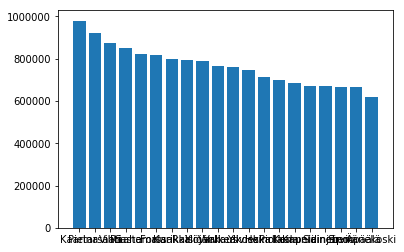

In [9]:
plt.bar(plotdat['kunta'], plotdat['maksetut_etuudet_euroa'])

## Datastore-api

Jos et tarvitse koko aineistoa, voit suodattaa siitä osio SQL:llä käyttäen CKAN:n DataStore-rajapintaa.

Alla olevassa esimerkissä tehdään rajaus `kunta`-muuttujasta ja siis etsitään vaan kuntaa *Veteli* koskevat tiedot.

In [10]:
kunta = "Veteli"
taulu = resources[0]['id']
muuttuja = 'kunta'
urli = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}" WHERE {muuttuja} LIKE \'{kunta}\''
urli_plain = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}"'
#urli = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\" WHERE %s LIKE '%s'" % (taulu, muuttuja, kunta)
#urli_plain = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\"" % (taulu)
response = urlopen(urli_plain)
da = json.loads(response.read())
dataa = json_normalize(da['result']['records'])
#dataa
print(dataa.head())

                                          _full_text  _id  aika aikajakso  \
0  '2005':4 '2067':9 '5':1 '52':10 '675':7 'alajä...    1  2005     vuosi   
1  '06':10 '2005':4 '280752':8 '3538':9 '5':1 '91...    2  2005     vuosi   
2  '08':10 '182':7 '2005':4 '3021':9 '5':1 '50317...    3  2005     vuosi   
3  '1460':10 '2005':4 '278':8 '351132':9 '48':11 ...    4  2005     vuosi   
4  '2005':4 '22':10 '5':1 '53057':8 '592':9 '90':...    5  2005     vuosi   

      etuus euroa_per_saaja     kunta kuntanumero maksetut_etuudet_euroa  \
0  Yhteensä         2067,52  Alajärvi           5                     NA   
1  Yhteensä         3538,06  Alajärvi           5                 280752   
2  Yhteensä         3021,08  Alajärvi           5                 503177   
3  Yhteensä         1460,48  Alajärvi           5                 351132   
4  Yhteensä          592,22  Alajärvi           5                  53057   

               oppilaitosaste saajat  
0                    Yhteensä    675  
1 